In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Data/output.csv(2)')

In [ ]:
df.head()

,question,is_correct
0,What did Yankee Doodle stick in his cap?,True
1,What did Yankee Doodle stick in his cap?,False
2,What did Yankee Doodle stick in his cap?,False
3,What word completes the phrase: “Everything bu...,True
4,What word completes the phrase: “Everything bu...,False


In [ ]:
print(df)

                                               question  is_correct
0              What did Yankee Doodle stick in his cap?        True
1              What did Yankee Doodle stick in his cap?       False
2              What did Yankee Doodle stick in his cap?       False
3     What word completes the phrase: “Everything bu...        True
4     What word completes the phrase: “Everything bu...       False
...                                                 ...         ...
4469  Which of these Triple Crown-winning horses ran...       False
4470  Which of these Triple Crown-winning horses ran...        True
4471  The lyric “dark side of the moon” is sung in w...        True
4472  The lyric “dark side of the moon” is sung in w...       False
4473  The lyric “dark side of the moon” is sung in w...       False

[4474 rows x 2 columns]


In [ ]:
df.drop_duplicates(subset=['question'], keep='first', inplace=True)

In [ ]:
df.head()

,question,is_correct
0,What did Yankee Doodle stick in his cap?,True
3,What word completes the phrase: “Everything bu...,True
6,What was the first theatrical feature film to ...,False
9,"Traditionally, an “amuse-bouche” arrives right...",True
12,"In the game of Candy Land, which player goes f...",True


In [ ]:
df.shape

(1550, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



In [ ]:
df['is_correct'] = encoder.fit_transform(df['is_correct'])

In [ ]:
df['is_correct'].value_counts()

0    999
1    551
Name: is_correct, dtype: int64

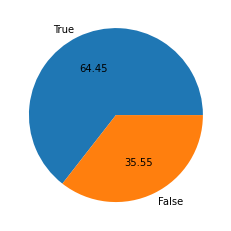

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['is_correct'].value_counts(), labels=['True','False'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head

<bound method NDFrame.head of                                                question  is_correct
0              What did Yankee Doodle stick in his cap?           1
3     What word completes the phrase: “Everything bu...           1
6     What was the first theatrical feature film to ...           0
9     Traditionally, an “amuse-bouche” arrives right...           1
12    In the game of Candy Land, which player goes f...           1
...                                                 ...         ...
4459  The first moons discovered orbiting a planet o...           0
4462  Which of these words means the opposite of “de...           0
4465  Which of these disputed territories is NOT cla...           1
4468  Which of these Triple Crown-winning horses ran...           0
4471  The lyric “dark side of the moon” is sung in w...           1

[1550 rows x 2 columns]>

In [ ]:
df['num_characters'] = df['question'].apply(len)

In [ ]:
df.head()

,question,is_correct,num_characters
0,What did Yankee Doodle stick in his cap?,1,40
3,What word completes the phrase: “Everything bu...,1,61
6,What was the first theatrical feature film to ...,0,78
9,"Traditionally, an “amuse-bouche” arrives right...",1,76
12,"In the game of Candy Land, which player goes f...",1,51


In [ ]:
df['num_words'] = df['question'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences'] = df['question'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1550.000000,1550.000000,1550.000000
mean,68.094194,13.879355,1.005806
std,15.117193,3.289991,0.084069
min,25.000000,5.000000,1.000000
25%,57.250000,11.000000,1.000000
50%,68.000000,14.000000,1.000000
75%,79.000000,16.000000,1.000000
max,109.000000,27.000000,3.000000


In [ ]:
df[df['is_correct'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,999.000000,999.000000,999.000000
mean,68.251251,13.923924,1.007007
std,14.894618,3.230339,0.094704
min,25.000000,5.000000,1.000000
25%,58.000000,12.000000,1.000000
50%,69.000000,14.000000,1.000000
75%,79.000000,16.000000,1.000000
max,109.000000,27.000000,3.000000


In [ ]:
df[df['is_correct'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,551.000000,551.000000,551.000000
mean,67.809437,13.798548,1.003630
std,15.522242,3.396961,0.060193
min,26.000000,6.000000,1.000000
25%,57.000000,11.000000,1.000000
50%,68.000000,14.000000,1.000000
75%,79.000000,16.000000,1.000000
max,104.000000,24.000000,2.000000


In [ ]:

import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

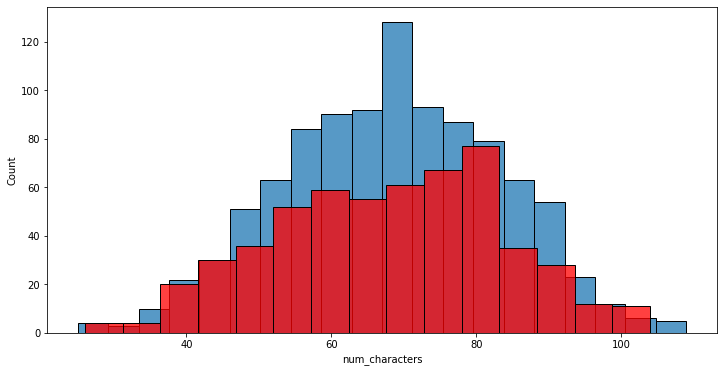

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['is_correct'] == 0]['num_characters'])
sns.histplot(df[df['is_correct'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

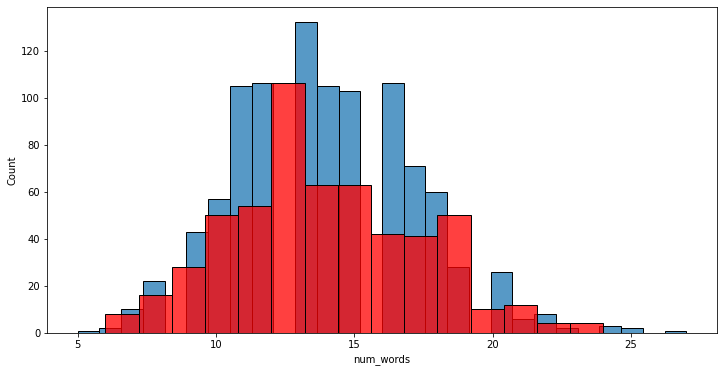

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['is_correct'] == 0]['num_words'])
sns.histplot(df[df['is_correct'] == 1]['num_words'],color='red')

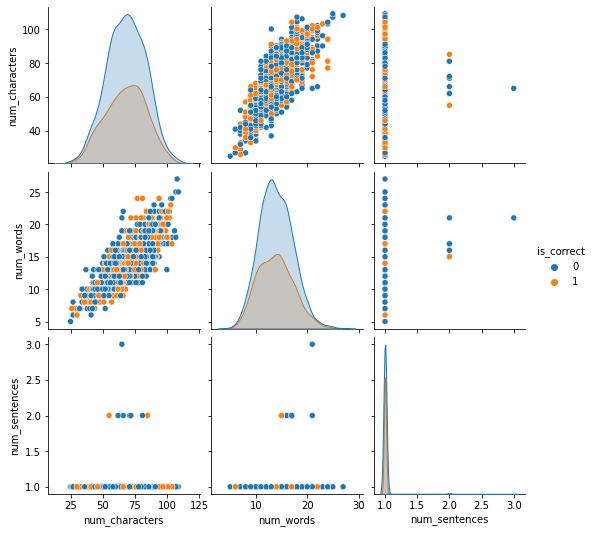

In [ ]:
sns.pairplot(df,hue='is_correct')

<AxesSubplot:>

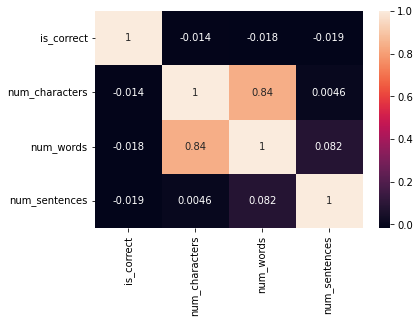

In [ ]:

sns.heatmap(df.corr(),annot=True)

In [ ]:

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


# Use the stopwords object here

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['question'][12]

'In the game of Candy Land, which player goes first?'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [ ]:
df['transformed_text'] = df['question'].apply(transform_text)

In [ ]:
df.head()

,question,is_correct,num_characters,num_words,num_sentences,transformed_text
0,What did Yankee Doodle stick in his cap?,1,40,9,1,yanke doodl stick cap
3,What word completes the phrase: “Everything bu...,1,61,13,1,word complet phrase everyth kitchen
6,What was the first theatrical feature film to ...,0,78,12,1,first theatric featur film complet
9,"Traditionally, an “amuse-bouche” arrives right...",1,76,15,1,tradit arriv right part meal
12,"In the game of Candy Land, which player goes f...",1,51,12,1,game candi land player goe first


In [ ]:
spam_corpus = []
for msg in df[df['is_correct'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

3323

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


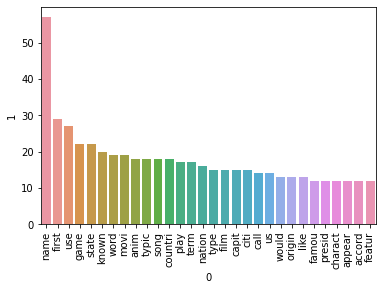

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['is_correct'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

6039

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


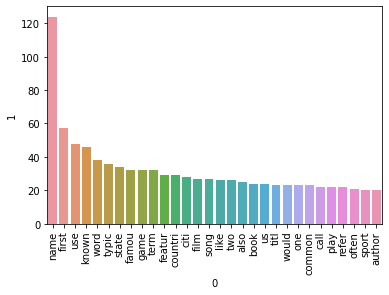

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,question,is_correct,num_characters,num_words,num_sentences,transformed_text
0,What did Yankee Doodle stick in his cap?,1,40,9,1,yanke doodl stick cap
3,What word completes the phrase: “Everything bu...,1,61,13,1,word complet phrase everyth kitchen
6,What was the first theatrical feature film to ...,0,78,12,1,first theatric featur film complet
9,"Traditionally, an “amuse-bouche” arrives right...",1,76,15,1,tradit arriv right part meal
12,"In the game of Candy Land, which player goes f...",1,51,12,1,game candi land player goe first


In [ ]:
df.shape


(1550, 6)

X = df['transformed_text'].values
y = df['is_correct'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
!pip install streamlit
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/my_dataframe.csv")

# Split the dataset into training and testing sets
X = df['transformed_text'].values
y = df['is_correct'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the training and testing sets
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
maxlen = 20
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the learning rate schedule and optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(
    learning_rate=lr_schedule,
    weight_decay=1e-5
)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Define the Streamlit app
st.title('Model Predictor')
question = st.text_input('Enter your question:')
if st.button('Predict'):
    transformed_question = tokenizer.texts_to_sequences([question])
    transformed_question = pad_sequences(transformed_question, padding='post', maxlen=maxlen)
    prediction = model.predict(transformed_question)
    if prediction > 0.5:
        st.write('True')
    else:
        st.write('False')




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=e4b7e0899a3835bc1b0ddb68b39698f865fcca662d29

  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


Test accuracy: 0.5258064270019531


2023-03-11 10:10:22.283 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [75]:

df.head(50)

,question,is_correct,num_characters,num_words,num_sentences,transformed_text
0,What did Yankee Doodle stick in his cap?,1,40,9,1,yanke doodl stick cap
3,What word completes the phrase: “Everything bu...,1,61,13,1,word complet phrase everyth kitchen
6,What was the first theatrical feature film to ...,0,78,12,1,first theatric featur film complet
9,"Traditionally, an “amuse-bouche” arrives right...",1,76,15,1,tradit arriv right part meal
12,"In the game of Candy Land, which player goes f...",1,51,12,1,game candi land player goe first
15,"In the popular comic strip, what color is Haga...",0,69,16,1,popular comic strip color hagar horribl beard
18,What spice comes from the crocus flower?,0,40,8,1,spice come crocu flower
21,Albert Einstein won a Nobel Prize for his work...,0,77,14,1,albert einstein nobel prize work scientif phen...
23,Buying a can of soda will incur a higher tax i...,0,59,14,1,buy soda incur higher tax citi
26,Who is credited with coining the phrase: “For ...,1,67,16,1,credit coin phrase bell toll


In [76]:
df['question']

0                What did Yankee Doodle stick in his cap?
3       What word completes the phrase: “Everything bu...
6       What was the first theatrical feature film to ...
9       Traditionally, an “amuse-bouche” arrives right...
12      In the game of Candy Land, which player goes f...
                              ...                        
4459    The first moons discovered orbiting a planet o...
4462    Which of these words means the opposite of “de...
4465    Which of these disputed territories is NOT cla...
4468    Which of these Triple Crown-winning horses ran...
4471    The lyric “dark side of the moon” is sung in w...
Name: question, Length: 1550, dtype: object

In [77]:
df['question'][6]

'What was the first theatrical feature film to be completely computer-animated?'

In [78]:
question = "What was the first theatrical feature film to be completely computer-animated?"
transformed_question = tokenizer.texts_to_sequences([question])
transformed_question = pad_sequences(transformed_question, padding='post', maxlen=maxlen)
prediction = model.predict(transformed_question)

if prediction > 0.5:
    print("True")
else:
    print("False")


1/1 [==============================] - 0s 36ms/step
False


In [83]:
df.to_csv('my_dataframe.csv')